In [69]:
import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt
import numpy as np

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print(f"Train sequences: {len(x_train)}, Test sequences: {len(x_test)}")
print(f"Example review (encoded): {x_train[0][:10]}")
print(f"Sentiment: {y_train[0]}")


Train sequences: 25000, Test sequences: 25000
Example review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
Sentiment: 1


In [70]:
maxlen = 200  
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Padded review shape: {x_train.shape}")

Padded review shape: (25000, 200)


In [71]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32),
    SimpleRNN(32, return_sequences=False),  
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 32)          320000    
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


#### 5. Train the model

In [72]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2
)


Epoch 1/10
40/40 [==============================] - 9s 201ms/step - loss: 0.6509 - accuracy: 0.6230 - val_loss: 0.6442 - val_accuracy: 0.6340
Epoch 2/10
40/40 [==============================] - 8s 189ms/step - loss: 0.5374 - accuracy: 0.7645 - val_loss: 0.4560 - val_accuracy: 0.8164
Epoch 3/10
40/40 [==============================] - 8s 190ms/step - loss: 0.3730 - accuracy: 0.8551 - val_loss: 0.3894 - val_accuracy: 0.8430
Epoch 4/10
40/40 [==============================] - 8s 188ms/step - loss: 0.2971 - accuracy: 0.8885 - val_loss: 0.3805 - val_accuracy: 0.8416
Epoch 5/10
40/40 [==============================] - 8s 192ms/step - loss: 0.2370 - accuracy: 0.9171 - val_loss: 0.3607 - val_accuracy: 0.8534
Epoch 6/10
40/40 [==============================] - 7s 185ms/step - loss: 0.2099 - accuracy: 0.9288 - val_loss: 0.4041 - val_accuracy: 0.8312
Epoch 7/10
40/40 [==============================] - 8s 195ms/step - loss: 0.1684 - accuracy: 0.9456 - val_loss: 0.3728 - val_accuracy: 0.8450
Epoch 

In [73]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


782/782 [==============================] - 20s 26ms/step - loss: 0.4296 - accuracy: 0.8396
Test Accuracy: 0.8396


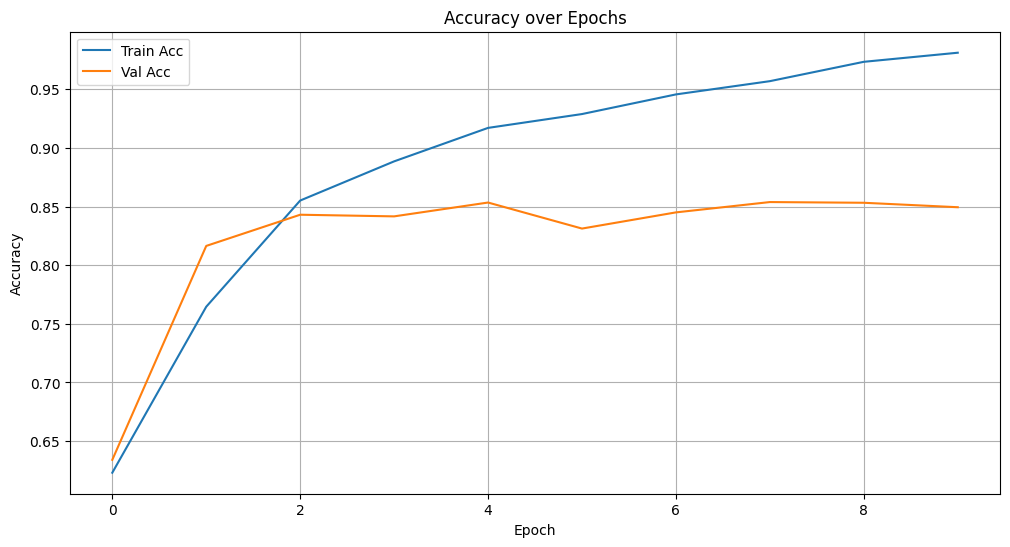

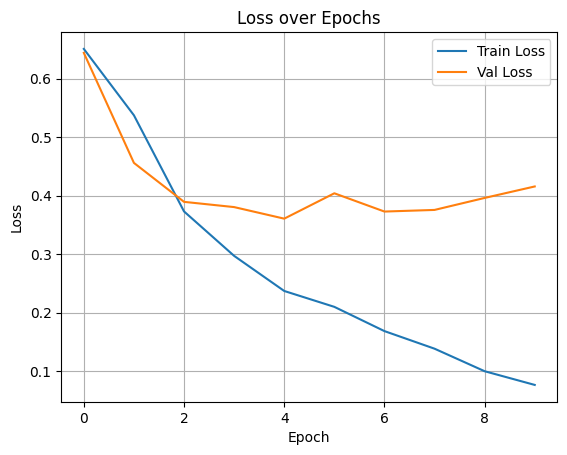

In [74]:
# Accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
from keras.layers import Embedding, LSTM, Dense

num_words = 10000
maxlen = 200  # 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [76]:
model_lstm = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 200, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [77]:
history_lstm = model_lstm.fit(
    x_train, y_train,
    epochs=15,
    batch_size=512,
    validation_split=0.2
)

Epoch 1/15
40/40 [==============================] - 4s 49ms/step - loss: 0.6727 - accuracy: 0.6366 - val_loss: 0.5573 - val_accuracy: 0.7826
Epoch 2/15
40/40 [==============================] - 1s 26ms/step - loss: 0.4530 - accuracy: 0.8232 - val_loss: 0.3697 - val_accuracy: 0.8576
Epoch 3/15
40/40 [==============================] - 1s 26ms/step - loss: 0.2830 - accuracy: 0.8921 - val_loss: 0.3088 - val_accuracy: 0.8716
Epoch 4/15
40/40 [==============================] - 1s 25ms/step - loss: 0.2077 - accuracy: 0.9286 - val_loss: 0.3052 - val_accuracy: 0.8708
Epoch 5/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1682 - accuracy: 0.9452 - val_loss: 0.3356 - val_accuracy: 0.8752
Epoch 6/15
40/40 [==============================] - 1s 25ms/step - loss: 0.1383 - accuracy: 0.9560 - val_loss: 0.3241 - val_accuracy: 0.8744
Epoch 7/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1094 - accuracy: 0.9700 - val_loss: 0.4008 - val_accuracy: 0.8642
Epoch 8/15
40

In [78]:
test_loss, test_acc = model_lstm.evaluate(x_test, y_test)
print(f"LSTM Test Accuracy: {test_acc:.4f}")

782/782 [==============================] - 7s 9ms/step - loss: 0.7927 - accuracy: 0.8204
LSTM Test Accuracy: 0.8204


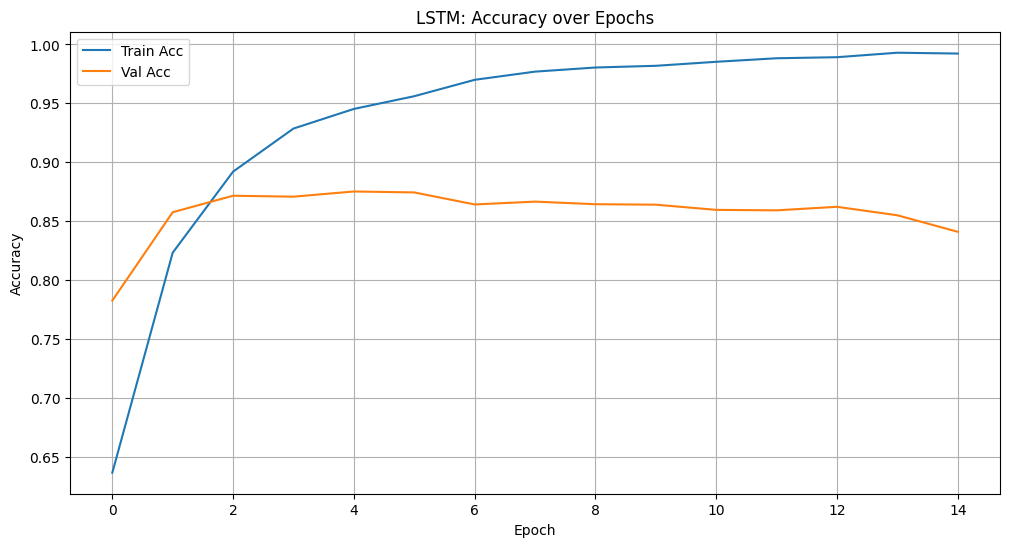

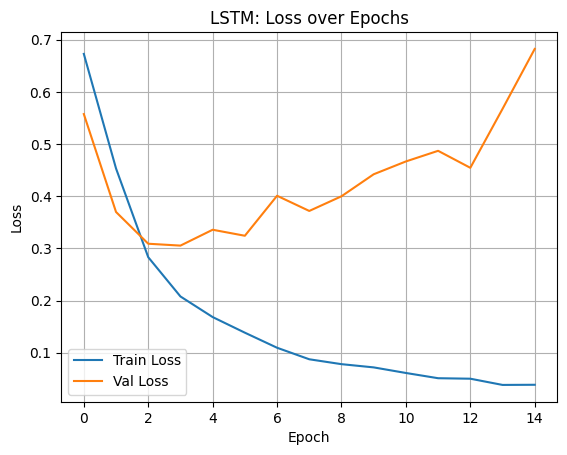

In [79]:
# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('LSTM: Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM: Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [81]:
from keras.layers import Embedding, GRU, Dense

model_gru = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    GRU(32),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 200, 32)           320000    
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [82]:
history_gru = model_gru.fit(
    x_train, y_train,
    epochs=15,
    batch_size=512,
    validation_split=0.2
)


Epoch 1/15
40/40 [==============================] - 4s 42ms/step - loss: 0.6841 - accuracy: 0.5920 - val_loss: 0.6592 - val_accuracy: 0.6490
Epoch 2/15
40/40 [==============================] - 1s 24ms/step - loss: 0.5014 - accuracy: 0.7728 - val_loss: 0.3977 - val_accuracy: 0.8208
Epoch 3/15
40/40 [==============================] - 1s 25ms/step - loss: 0.2934 - accuracy: 0.8781 - val_loss: 0.3223 - val_accuracy: 0.8650
Epoch 4/15
40/40 [==============================] - 1s 25ms/step - loss: 0.2108 - accuracy: 0.9205 - val_loss: 0.3213 - val_accuracy: 0.8746
Epoch 5/15
40/40 [==============================] - 1s 26ms/step - loss: 0.1649 - accuracy: 0.9420 - val_loss: 0.3405 - val_accuracy: 0.8662
Epoch 6/15
40/40 [==============================] - 1s 25ms/step - loss: 0.1320 - accuracy: 0.9572 - val_loss: 0.3605 - val_accuracy: 0.8608
Epoch 7/15
40/40 [==============================] - 1s 24ms/step - loss: 0.1195 - accuracy: 0.9615 - val_loss: 0.4365 - val_accuracy: 0.8464
Epoch 8/15
40

In [83]:
test_loss, test_acc = model_gru.evaluate(x_test, y_test)
print(f"GRU Test Accuracy: {test_acc:.4f}")

782/782 [==============================] - 7s 9ms/step - loss: 0.6605 - accuracy: 0.8376
GRU Test Accuracy: 0.8376


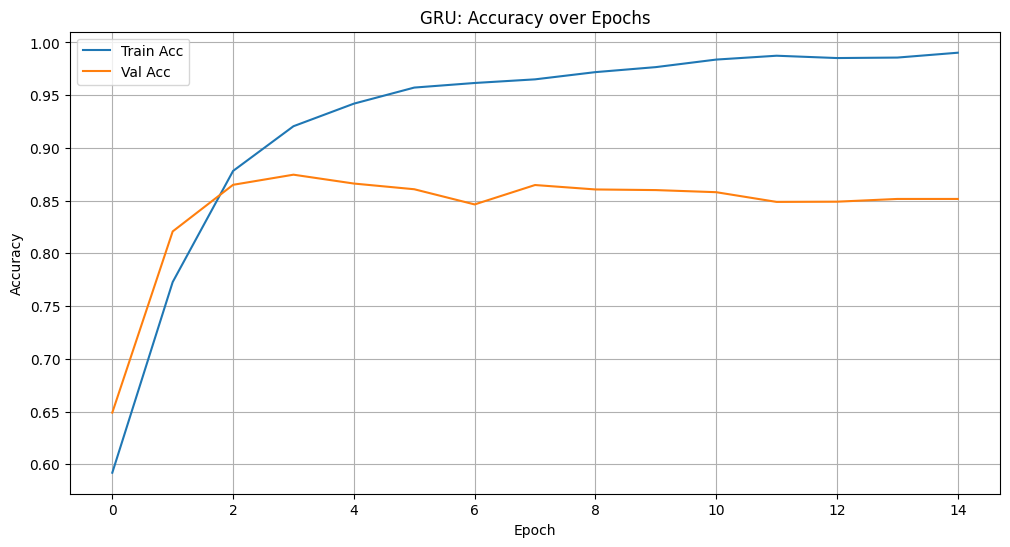

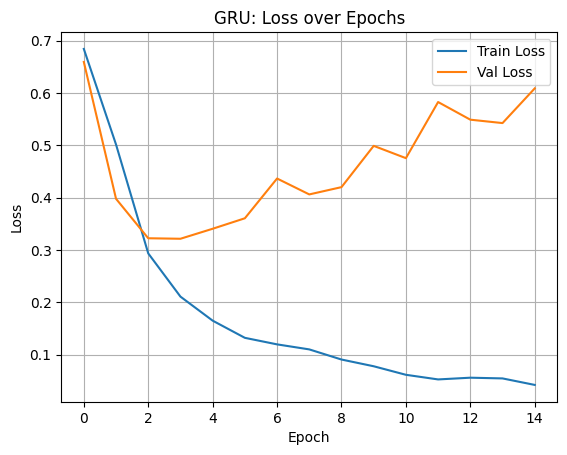

In [84]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['accuracy'], label='Train Acc')
plt.plot(history_gru.history['val_accuracy'], label='Val Acc')
plt.title('GRU: Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_gru.history['loss'], label='Train Loss')
plt.plot(history_gru.history['val_loss'], label='Val Loss')
plt.title('GRU: Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
sample = x_test[100].reshape(1, -1)

pred_rnn = model.predict(sample)[0][0]
pred_lstm = model_lstm.predict(sample)[0][0]
pred_gru = model_gru.predict(sample)[0][0]

print(f"RNN Prediction: {pred_rnn:.4f}")
print(f"LSTM Prediction: {pred_lstm:.4f}")
print(f"GRU Prediction: {pred_gru:.4f}")


1/1 [==============================] - 0s 482ms/step
RNN Prediction: 0.0124
LSTM Prediction: 0.0044
GRU Prediction: 0.1312
